Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [391]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [392]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


**Dwa gangi**

Przetesuj poniższe instrukcje:

In [393]:
[2]*12

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [394]:
[-3]*10+[4]*5

[-3, -3, -3, -3, -3, -3, -3, -3, -3, -3, 4, 4, 4, 4, 4]

In [395]:
np.append([1,2,3],[4,5])

array([1, 2, 3, 4, 5])

Przygotowujemy zbiór danych:

In [396]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000)
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2) #tablica wsp. x dla 2000 punktów
ys = np.append(y_label1, y_label2) #tablica wsp. y dla 2000 punktów
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))

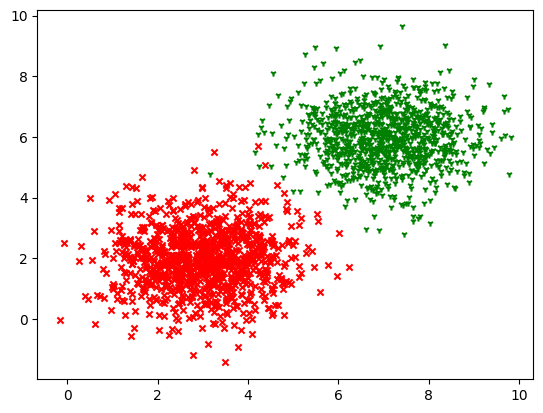

In [397]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

Przygotowanie danych:

In [398]:
xs[0:10].reshape(-1,1)

array([[3.08456138],
       [3.09235896],
       [2.59064648],
       [3.80345406],
       [2.4284587 ],
       [3.03407197],
       [3.06640068],
       [3.65832989],
       [2.9812158 ],
       [4.14363636]])

In [399]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[3.08456138, 2.38798423],
       [3.09235896, 1.52477974],
       [2.59064648, 2.53923651],
       ...,
       [6.72630046, 5.77070292],
       [8.07632849, 6.05743724],
       [7.71097923, 6.29796197]])

In [400]:
def subset_dataset(data_points, label,subset_size):
    arr = np.arange(len(data_points))
    l=len(data_points)
    s=int(subset_size*l)
    np.random.shuffle(arr)
    data_points_val = data_points[arr[0:s]]
    label_val = label[arr[0:s]]
    #print(type(label_train))
    data_points_train = data_points[arr[s:int(l*(1-subset_size))]]
    label_train = label[arr[s:int(l*(1-subset_size))]]
    data_points_test = data_points[arr[int(l*(1-subset_size)):]]
    label_test = label[arr[int(l*(1-subset_size)):]]
    return data_points_train,label_train,data_points_val,label_val,data_points_test,label_test

In [401]:
data_points_train,label_train,data_points_val,label_val,data_points_test,label_test = subset_dataset(data_points, labels,0.1)

In [402]:
print(data_points_train.size,label_train.size,data_points_val.size,label_val.size,data_points_test.size,label_test.size)

3200 1600 400 200 400 200


##Wersja podstawowa

Definiujemy model:

In [403]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [404]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [405]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [406]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

Informacja o modelu:

In [407]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Proces **uczenia**:

In [408]:
epochs = 100
h = model.fit(data_points_train,label_train, verbose=1 ,epochs=epochs,validation_data=(data_points_val,label_val))

Epoch 1/100
50/50 [==============================] - 1s 8ms/step - loss: 0.5613 - accuracy: 0.6156 - val_loss: 0.4438 - val_accuracy: 0.8750
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4056 - accuracy: 0.8637 - val_loss: 0.3555 - val_accuracy: 0.8400
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3332 - accuracy: 0.9244 - val_loss: 0.3058 - val_accuracy: 0.9700
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 0.9506 - val_loss: 0.2538 - val_accuracy: 0.9600
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.9594 - val_loss: 0.2241 - val_accuracy: 0.9700
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 0.9712 - val_loss: 0.1980 - val_accuracy: 0.9800
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9744 - val_loss: 0.1795 - val_accuracy: 0.9950
Epoch 8/100
5

In [409]:
Loss = h.history['loss']
Loss

[0.5613405108451843,
 0.4056021571159363,
 0.3332430124282837,
 0.28535038232803345,
 0.2502104640007019,
 0.22314457595348358,
 0.2020430564880371,
 0.18280746042728424,
 0.16869907081127167,
 0.15688954293727875,
 0.14652054011821747,
 0.1379857361316681,
 0.13052520155906677,
 0.12394711375236511,
 0.11774004995822906,
 0.11206786334514618,
 0.10739780217409134,
 0.10325941443443298,
 0.09974829852581024,
 0.09587828814983368,
 0.0926375761628151,
 0.08990467339754105,
 0.08682495355606079,
 0.08434602618217468,
 0.08196830004453659,
 0.07978559285402298,
 0.07786685228347778,
 0.07559967786073685,
 0.0737893134355545,
 0.07227358967065811,
 0.07093541324138641,
 0.06936652958393097,
 0.06760608404874802,
 0.06647549569606781,
 0.06532659381628036,
 0.06392719596624374,
 0.06306671351194382,
 0.06181362643837929,
 0.060643501579761505,
 0.059513531625270844,
 0.05867745727300644,
 0.05760778486728668,
 0.0567958727478981,
 0.055730681866407394,
 0.055267129093408585,
 0.054217930883

In [410]:
val_loss = h.history['val_loss']
val_loss

[0.44377052783966064,
 0.35551074147224426,
 0.3058384954929352,
 0.2537660598754883,
 0.2241067886352539,
 0.19795429706573486,
 0.17949746549129486,
 0.1745574176311493,
 0.14871573448181152,
 0.13709113001823425,
 0.1281411349773407,
 0.12125959247350693,
 0.11374397575855255,
 0.10684072226285934,
 0.10021428018808365,
 0.09614818543195724,
 0.09196481853723526,
 0.08697457611560822,
 0.08406394720077515,
 0.08053210377693176,
 0.07821977883577347,
 0.07487373054027557,
 0.07151558995246887,
 0.0707656592130661,
 0.06737279146909714,
 0.0661991611123085,
 0.06432750821113586,
 0.06124519184231758,
 0.061161767691373825,
 0.057977043092250824,
 0.05701533332467079,
 0.05579689145088196,
 0.056079763919115067,
 0.053071390837430954,
 0.052644938230514526,
 0.05495487153530121,
 0.05034517124295235,
 0.04826020821928978,
 0.04726181551814079,
 0.04638923332095146,
 0.04581255093216896,
 0.0453137531876564,
 0.04559947922825813,
 0.04413435980677605,
 0.042711950838565826,
 0.045171685

In [411]:
val_accuracy = h.history['val_accuracy']
accuracy = h.history['accuracy']


Sprawdźmy jakie są **wartości wag**:

In [412]:
weights = model.get_weights()


print(weights[0])
print(weights[1])    #bias

[[1.033173 ]
 [1.3348391]]
[-10.38845]


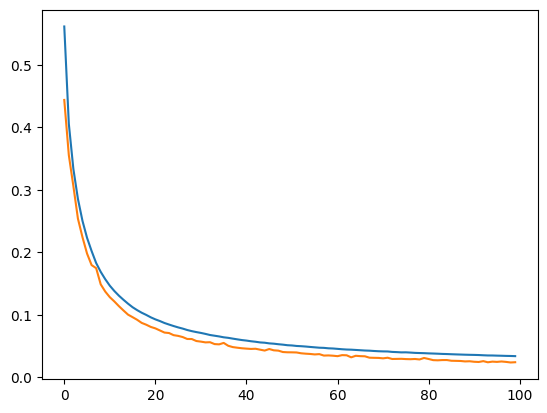

In [413]:
plt.plot(Loss)
plt.plot(val_loss)

plt.show()

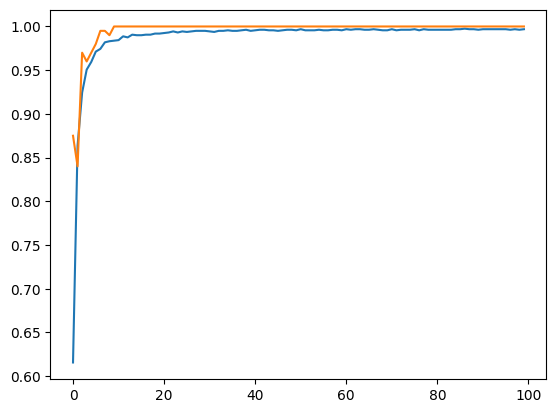

In [414]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.show()

Model.evaluate for test data

In [415]:
results = model.evaluate(data_points_test,label_test)
print("test loss, test acc:", results)

7/7 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 0.9950
test loss, test acc: [0.02971092239022255, 0.9950000047683716]


Model.predict for test dataset

In [416]:
predictions = model.predict(data_points_test)

7/7 [==============================] - 0s 3ms/step


In [417]:
predictions

array([[5.74056897e-03],
       [4.77366615e-03],
       [4.79873409e-03],
       [8.89747679e-01],
       [2.26344112e-02],
       [4.42783727e-04],
       [5.21922950e-03],
       [4.25217859e-02],
       [9.79442179e-01],
       [9.84290063e-01],
       [1.51714850e-02],
       [9.96778667e-01],
       [9.99722242e-01],
       [3.98147758e-03],
       [2.03761039e-03],
       [9.58830357e-01],
       [9.89290059e-01],
       [9.98581290e-01],
       [9.75174189e-01],
       [1.51913404e-01],
       [9.96818304e-01],
       [9.94318008e-01],
       [9.94331241e-01],
       [9.97490346e-01],
       [9.96816695e-01],
       [9.14765656e-01],
       [9.85125601e-01],
       [9.91162956e-01],
       [9.96735990e-01],
       [9.80705917e-01],
       [5.76408803e-01],
       [4.91423998e-03],
       [9.74377751e-01],
       [8.45220219e-03],
       [9.93487000e-01],
       [2.44723447e-02],
       [3.14707123e-03],
       [2.13892176e-03],
       [3.17710172e-03],
       [7.77259981e-03],


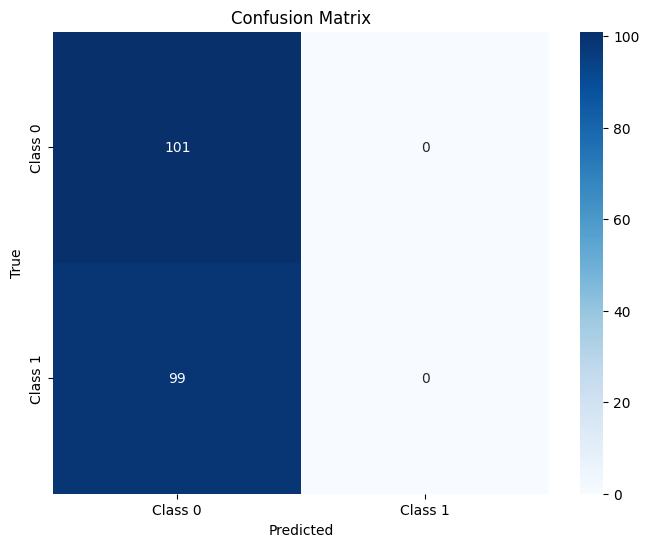

In [418]:


y_true = np.array(label_test, dtype=int)
y_pred = np.array(predictions, dtype=int)

# Convert continuous predictions to class labels (binary classification example)
y_pred = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(label_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

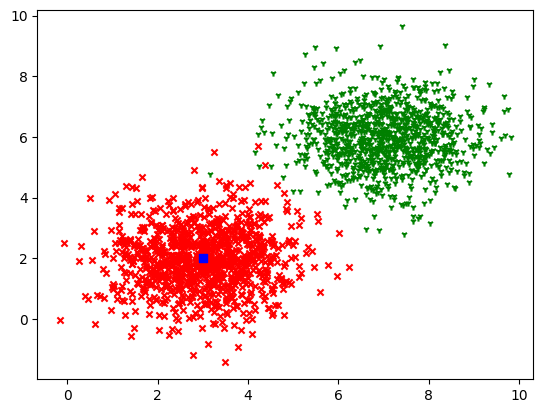

1/1 [==============================] - 0s 36ms/step


array([[0.00976389]], dtype=float32)

In [419]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

Liczba epok 50

Definiujemy model:

In [420]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [421]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [422]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [423]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

Informacja o modelu:

In [424]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Proces **uczenia**:

In [425]:
epochs = 50
h = model.fit(data_points_train,label_train, verbose=1 ,epochs=epochs,validation_data=(data_points_val,label_val))

Epoch 1/50
50/50 [==============================] - 1s 5ms/step - loss: 0.7432 - accuracy: 0.5781 - val_loss: 0.4610 - val_accuracy: 0.7200
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8512 - val_loss: 0.3653 - val_accuracy: 0.9700
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.9337 - val_loss: 0.2897 - val_accuracy: 0.9350
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2832 - accuracy: 0.9494 - val_loss: 0.2518 - val_accuracy: 0.9700
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.9644 - val_loss: 0.2195 - val_accuracy: 0.9700
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9737 - val_loss: 0.2003 - val_accuracy: 0.9950
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.9781 - val_loss: 0.1758 - val_accuracy: 0.9900
Epoch 8/50
50/50 [==

In [426]:
Loss = h.history['loss']
Loss

[0.7431750297546387,
 0.42075684666633606,
 0.3319653272628784,
 0.2831713855266571,
 0.24753496050834656,
 0.21947048604488373,
 0.19833961129188538,
 0.18198128044605255,
 0.1674334704875946,
 0.1562575399875641,
 0.14546747505664825,
 0.13699114322662354,
 0.13025763630867004,
 0.12270532548427582,
 0.11712243407964706,
 0.11182510107755661,
 0.10709516704082489,
 0.10287774354219437,
 0.09905615448951721,
 0.0958385020494461,
 0.09217116981744766,
 0.08943009376525879,
 0.08668186515569687,
 0.08339094370603561,
 0.08212518692016602,
 0.07953925430774689,
 0.07759203761816025,
 0.07564333081245422,
 0.0743584930896759,
 0.07212219387292862,
 0.0704309493303299,
 0.06908492743968964,
 0.06761016696691513,
 0.06617526710033417,
 0.06514616310596466,
 0.06357365101575851,
 0.062660351395607,
 0.06166725233197212,
 0.06013286113739014,
 0.05939648300409317,
 0.058405570685863495,
 0.057665131986141205,
 0.0565909817814827,
 0.05585955083370209,
 0.05500354617834091,
 0.0542964302003383

In [427]:
val_loss = h.history['val_loss']
val_loss

[0.4609641134738922,
 0.3653091490268707,
 0.28971487283706665,
 0.25181570649147034,
 0.2194747030735016,
 0.2002658098936081,
 0.17580966651439667,
 0.1598692685365677,
 0.1538253277540207,
 0.13765177130699158,
 0.12648901343345642,
 0.12142007797956467,
 0.11565384268760681,
 0.1060359925031662,
 0.10148147493600845,
 0.09559199213981628,
 0.09183896332979202,
 0.08639652281999588,
 0.09225808829069138,
 0.07992543280124664,
 0.07794103026390076,
 0.07511506229639053,
 0.07196810841560364,
 0.06878525763750076,
 0.06759601831436157,
 0.06602486968040466,
 0.06282365322113037,
 0.060868483036756516,
 0.06080273166298866,
 0.05763554945588112,
 0.060901228338479996,
 0.05631069839000702,
 0.05466238409280777,
 0.053258877247571945,
 0.052473507821559906,
 0.05487394332885742,
 0.05045425519347191,
 0.0486861951649189,
 0.04776332527399063,
 0.046147264540195465,
 0.0452188141644001,
 0.044550538063049316,
 0.044948771595954895,
 0.043800558894872665,
 0.042144130915403366,
 0.0420335

In [428]:
val_accuracy = h.history['val_accuracy']
accuracy = h.history['accuracy']


Sprawdźmy jakie są **wartości wag**:

In [429]:
weights = model.get_weights()


print(weights[0])
print(weights[1])    #bias

[[0.79450125]
 [1.1485249 ]]
[-8.358202]


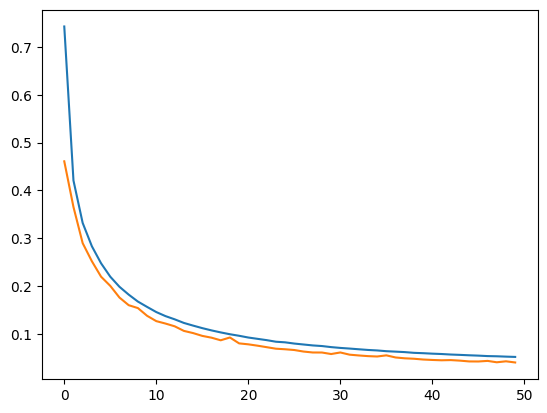

In [430]:
plt.plot(Loss)
plt.plot(val_loss)

plt.show()

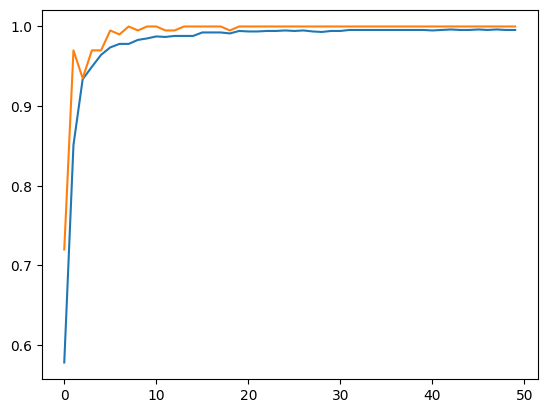

In [431]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.show()

Model.evaluate for test data

In [432]:
results = model.evaluate(data_points_test,label_test)
print("test loss, test acc:", results)

7/7 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9950
test loss, test acc: [0.04705239459872246, 0.9950000047683716]


Model.predict for test dataset

In [433]:
predictions = model.predict(data_points_test)

7/7 [==============================] - 0s 4ms/step


In [434]:
predictions

array([[1.62126739e-02],
       [1.47973187e-02],
       [1.60226803e-02],
       [8.72583985e-01],
       [4.28699441e-02],
       [2.03446671e-03],
       [1.50240604e-02],
       [7.94578493e-02],
       [9.58289802e-01],
       [9.70685542e-01],
       [3.90438363e-02],
       [9.91139233e-01],
       [9.98941302e-01],
       [1.13685234e-02],
       [6.79726107e-03],
       [9.39456642e-01],
       [9.77962613e-01],
       [9.95592356e-01],
       [9.57980216e-01],
       [2.20202073e-01],
       [9.91763830e-01],
       [9.85157251e-01],
       [9.87314045e-01],
       [9.93317425e-01],
       [9.91785049e-01],
       [8.83466423e-01],
       [9.71446753e-01],
       [9.80718315e-01],
       [9.90974963e-01],
       [9.69291508e-01],
       [6.31525695e-01],
       [1.29785016e-02],
       [9.55273569e-01],
       [2.46977583e-02],
       [9.84235644e-01],
       [4.57196981e-02],
       [9.58518125e-03],
       [6.81394339e-03],
       [1.05524417e-02],
       [2.24673767e-02],


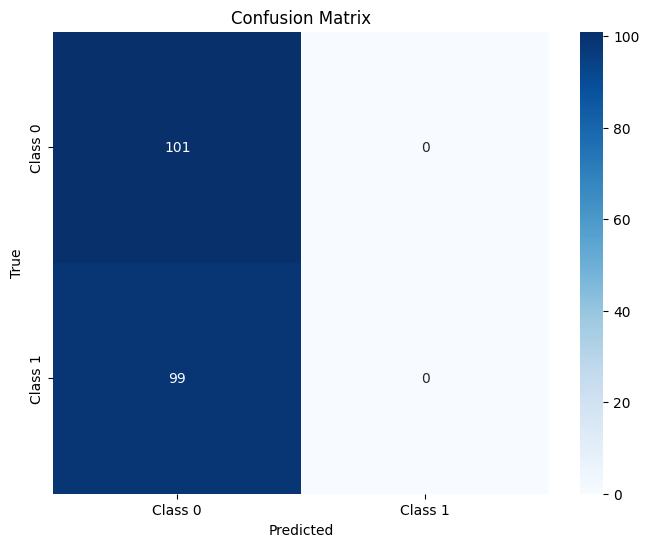

In [435]:


y_true = np.array(label_test, dtype=int)
y_pred = np.array(predictions, dtype=int)

# Convert continuous predictions to class labels (binary classification example)
y_pred = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(label_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

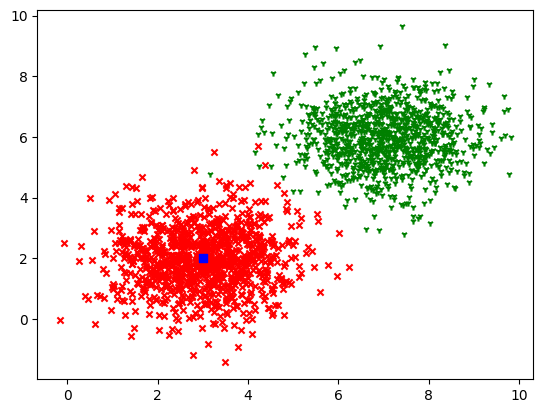

1/1 [==============================] - 0s 50ms/step


array([[0.02465892]], dtype=float32)

In [436]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

##Liczba epok 150

Definiujemy model:

In [437]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [438]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [439]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [440]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

Informacja o modelu:

In [441]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Proces **uczenia**:

In [442]:
epochs = 150
h = model.fit(data_points_train,label_train, verbose=1 ,epochs=epochs,validation_data=(data_points_val,label_val))

Epoch 1/150
50/50 [==============================] - 1s 9ms/step - loss: 0.5907 - accuracy: 0.6256 - val_loss: 0.4443 - val_accuracy: 0.8150
Epoch 2/150
50/50 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8569 - val_loss: 0.3525 - val_accuracy: 0.8950
Epoch 3/150
50/50 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.9250 - val_loss: 0.3051 - val_accuracy: 0.9650
Epoch 4/150
50/50 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.9469 - val_loss: 0.2548 - val_accuracy: 0.9500
Epoch 5/150
50/50 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.9588 - val_loss: 0.2242 - val_accuracy: 0.9700
Epoch 6/150
50/50 [==============================] - 0s 2ms/step - loss: 0.2239 - accuracy: 0.9719 - val_loss: 0.2009 - val_accuracy: 0.9850
Epoch 7/150
50/50 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9756 - val_loss: 0.1778 - val_accuracy: 0.9900
Epoch 8/150
5

In [443]:
Loss = h.history['loss']
Loss

[0.590742826461792,
 0.4112163484096527,
 0.3363023102283478,
 0.28653815388679504,
 0.2516437768936157,
 0.22394365072250366,
 0.20188823342323303,
 0.18361331522464752,
 0.16986480355262756,
 0.15714216232299805,
 0.14678871631622314,
 0.13823416829109192,
 0.13046374917030334,
 0.12378280609846115,
 0.11777880787849426,
 0.11238237470388412,
 0.10759604722261429,
 0.10304993391036987,
 0.09934970736503601,
 0.09616701304912567,
 0.09272732585668564,
 0.08972898125648499,
 0.08665242046117783,
 0.08428845554590225,
 0.08197831362485886,
 0.07986726611852646,
 0.07755319774150848,
 0.07587854564189911,
 0.07400920242071152,
 0.07229749858379364,
 0.07064986974000931,
 0.0696544349193573,
 0.06782732903957367,
 0.0663568377494812,
 0.0651867613196373,
 0.0640062540769577,
 0.06294997781515121,
 0.06181366741657257,
 0.06075691804289818,
 0.05959014967083931,
 0.05853581428527832,
 0.05769534409046173,
 0.05697192996740341,
 0.05598907917737961,
 0.05506215989589691,
 0.0545432604849338

In [444]:
val_loss = h.history['val_loss']
val_loss

[0.4442528188228607,
 0.35254982113838196,
 0.30505266785621643,
 0.254835307598114,
 0.22420309484004974,
 0.20085935294628143,
 0.1778460443019867,
 0.163987934589386,
 0.1484462022781372,
 0.13758234679698944,
 0.1303674727678299,
 0.12198083847761154,
 0.11599807441234589,
 0.10746635496616364,
 0.10045316070318222,
 0.09548116475343704,
 0.09129828214645386,
 0.08692394942045212,
 0.08535218238830566,
 0.08449602872133255,
 0.07736720889806747,
 0.07434478402137756,
 0.07532951235771179,
 0.07106733322143555,
 0.06858671456575394,
 0.0665426179766655,
 0.06316857784986496,
 0.06328114122152328,
 0.060454294085502625,
 0.059245701879262924,
 0.05638759583234787,
 0.0551188699901104,
 0.055741988122463226,
 0.05432404577732086,
 0.05269495025277138,
 0.05153797194361687,
 0.04931294545531273,
 0.04794551804661751,
 0.04805228114128113,
 0.04726381599903107,
 0.046081338077783585,
 0.04576616734266281,
 0.044893622398376465,
 0.04312319681048393,
 0.044787775725126266,
 0.04218613728

In [445]:
val_accuracy = h.history['val_accuracy']
accuracy = h.history['accuracy']


Sprawdźmy jakie są **wartości wag**:

In [446]:
weights = model.get_weights()


print(weights[0])
print(weights[1])    #bias

[[1.1949971]
 [1.4641174]]
[-11.657985]


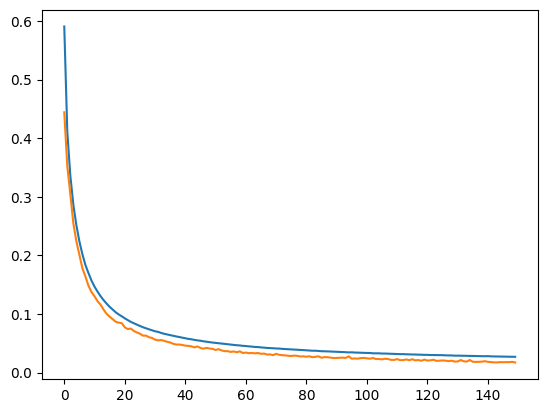

In [447]:
plt.plot(Loss)
plt.plot(val_loss)

plt.show()

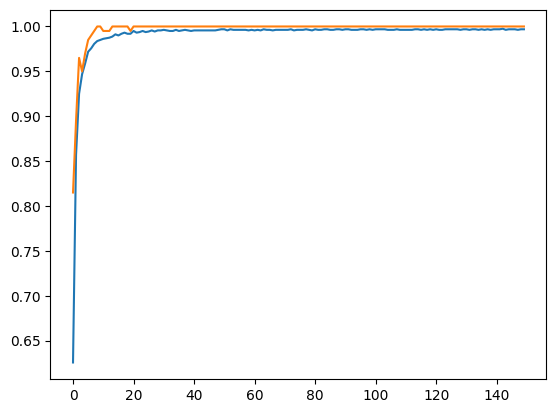

In [448]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.show()

Model.evaluate for test data

In [449]:
results = model.evaluate(data_points_test,label_test)
print("test loss, test acc:", results)

7/7 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9950
test loss, test acc: [0.02313968911767006, 0.9950000047683716]


Model.predict for test dataset

In [450]:
predictions = model.predict(data_points_test)

7/7 [==============================] - 0s 2ms/step


In [451]:
predictions

array([[3.16308206e-03],
       [2.47248448e-03],
       [2.36607459e-03],
       [9.10774827e-01],
       [1.62743535e-02],
       [1.75577414e-04],
       [2.83937319e-03],
       [3.07618417e-02],
       [9.88773108e-01],
       [9.90929902e-01],
       [8.88469815e-03],
       [9.98569131e-01],
       [9.99901533e-01],
       [2.17645499e-03],
       [1.00333989e-03],
       [9.71997678e-01],
       [9.94213283e-01],
       [9.99420226e-01],
       [9.84676361e-01],
       [1.28875583e-01],
       [9.98529136e-01],
       [9.97383893e-01],
       [9.97108936e-01],
       [9.98862267e-01],
       [9.98525381e-01],
       [9.38759327e-01],
       [9.91574585e-01],
       [9.95410144e-01],
       [9.98555064e-01],
       [9.87603962e-01],
       [5.68290174e-01],
       [2.82982644e-03],
       [9.84508157e-01],
       [4.55301348e-03],
       [9.96844828e-01],
       [1.77561659e-02],
       [1.64759485e-03],
       [1.08581153e-03],
       [1.57099124e-03],
       [4.21761209e-03],


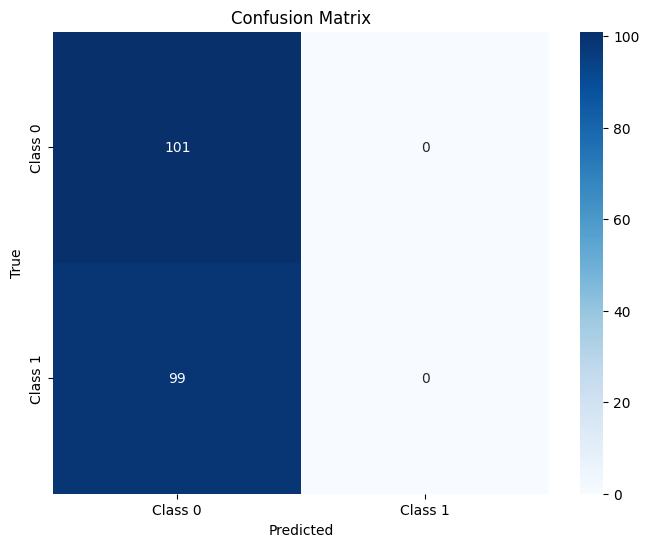

In [452]:


y_true = np.array(label_test, dtype=int)
y_pred = np.array(predictions, dtype=int)

# Convert continuous predictions to class labels (binary classification example)
y_pred = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(label_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

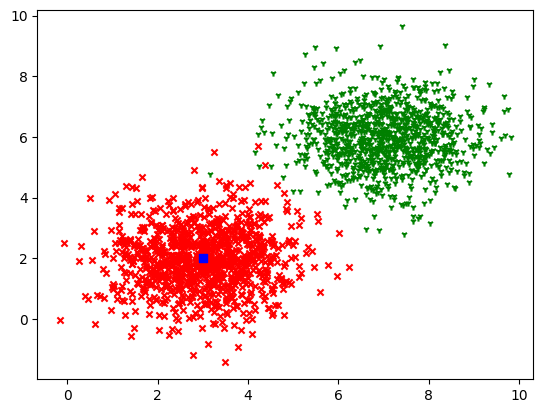

1/1 [==============================] - 0s 34ms/step


array([[0.00579609]], dtype=float32)

In [453]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

##współczynnik uczenia 0.01 (SGD)


Definiujemy model:

In [454]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [455]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [456]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

In [457]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

Informacja o modelu:

In [458]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Proces **uczenia**:

In [459]:
epochs = 100
h = model.fit(data_points_train,label_train, verbose=1 ,epochs=epochs,validation_data=(data_points_val,label_val))

Epoch 1/100
50/50 [==============================] - 1s 5ms/step - loss: 0.7553 - accuracy: 0.5294 - val_loss: 0.6296 - val_accuracy: 0.5950
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.5569 - val_loss: 0.5938 - val_accuracy: 0.6050
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6190 - accuracy: 0.5663 - val_loss: 0.5619 - val_accuracy: 0.5900
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.5858 - accuracy: 0.5606 - val_loss: 0.5401 - val_accuracy: 0.6150
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5571 - accuracy: 0.5769 - val_loss: 0.5154 - val_accuracy: 0.6250
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.6006 - val_loss: 0.4947 - val_accuracy: 0.6300
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.6381 - val_loss: 0.4789 - val_accuracy: 0.7200
Epoch 8/100
5

In [460]:
Loss = h.history['loss']
Loss

[0.7553033232688904,
 0.6580974459648132,
 0.6189915537834167,
 0.5857640504837036,
 0.5571330785751343,
 0.532480776309967,
 0.5106773376464844,
 0.4920154809951782,
 0.4751577079296112,
 0.4604327082633972,
 0.4474315643310547,
 0.4345531463623047,
 0.42429298162460327,
 0.4136570692062378,
 0.4041490852832794,
 0.39529097080230713,
 0.38650789856910706,
 0.37877339124679565,
 0.3710091710090637,
 0.36416110396385193,
 0.3573181927204132,
 0.35075926780700684,
 0.34442174434661865,
 0.33840712904930115,
 0.33243370056152344,
 0.32699641585350037,
 0.32153499126434326,
 0.3166095018386841,
 0.3113686442375183,
 0.3066784143447876,
 0.301982581615448,
 0.2974494695663452,
 0.2928880453109741,
 0.2885608971118927,
 0.2845868766307831,
 0.28068211674690247,
 0.2767708897590637,
 0.2728481888771057,
 0.2693691849708557,
 0.26586970686912537,
 0.2623380422592163,
 0.2589162588119507,
 0.25561007857322693,
 0.2524658441543579,
 0.24933353066444397,
 0.24622876942157745,
 0.2432846873998642,

In [461]:
val_loss = h.history['val_loss']
val_loss

[0.6296356916427612,
 0.5938267707824707,
 0.5619361996650696,
 0.5400850176811218,
 0.5154123902320862,
 0.4946829080581665,
 0.4789261519908905,
 0.4631446599960327,
 0.45011505484580994,
 0.4384671449661255,
 0.4257951080799103,
 0.4145458936691284,
 0.4059011936187744,
 0.3980693817138672,
 0.38850972056388855,
 0.37997350096702576,
 0.37189146876335144,
 0.36504095792770386,
 0.3566136658191681,
 0.34999561309814453,
 0.34346720576286316,
 0.3378535807132721,
 0.33300209045410156,
 0.3259541392326355,
 0.32087716460227966,
 0.31503716111183167,
 0.3091687858104706,
 0.3042497932910919,
 0.3004809319972992,
 0.2948240339756012,
 0.2903100550174713,
 0.2851862609386444,
 0.28093886375427246,
 0.2780850827693939,
 0.27220389246940613,
 0.2690682113170624,
 0.2650122046470642,
 0.26076340675354004,
 0.2568228542804718,
 0.2539733052253723,
 0.2501410245895386,
 0.24650664627552032,
 0.2436511367559433,
 0.24013639986515045,
 0.2365247905254364,
 0.23389728367328644,
 0.230530649423599

In [462]:
val_accuracy = h.history['val_accuracy']
accuracy = h.history['accuracy']


Sprawdźmy jakie są **wartości wag**:

In [463]:
weights = model.get_weights()


print(weights[0])
print(weights[1])    #bias

[[0.29073623]
 [0.80489254]]
[-4.249588]


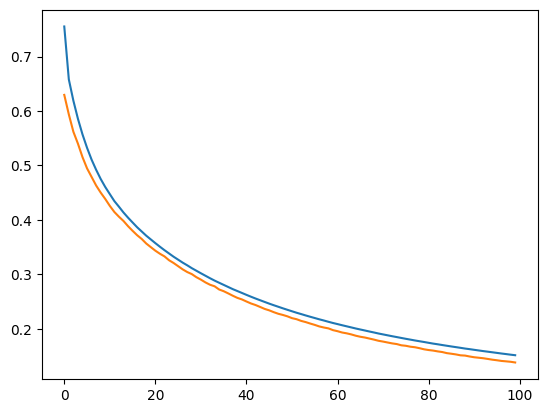

In [464]:
plt.plot(Loss)
plt.plot(val_loss)

plt.show()

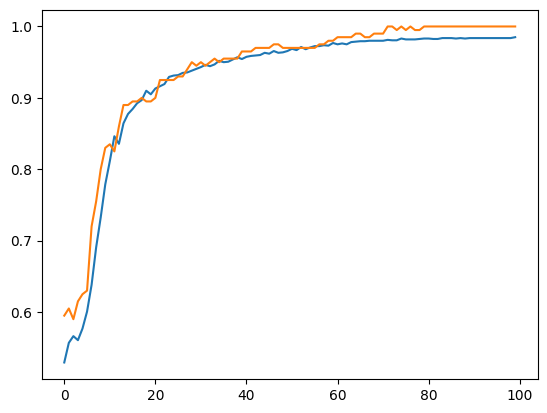

In [465]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.show()

Model.evaluate for test data

In [466]:
results = model.evaluate(data_points_test,label_test)
print("test loss, test acc:", results)

7/7 [==============================] - 0s 2ms/step - loss: 0.1487 - accuracy: 0.9850
test loss, test acc: [0.14870315790176392, 0.9850000143051147]


Model.predict for test dataset

In [467]:
predictions = model.predict(data_points_test)

7/7 [==============================] - 0s 2ms/step


In [468]:
predictions

array([[0.12175366],
       [0.135527  ],
       [0.17058426],
       [0.8429716 ],
       [0.13879353],
       [0.04292206],
       [0.11753467],
       [0.25053647],
       [0.836851  ],
       [0.9052428 ],
       [0.23500045],
       [0.93511796],
       [0.9855479 ],
       [0.0870147 ],
       [0.07257206],
       [0.8796423 ],
       [0.91261995],
       [0.958844  ],
       [0.8885053 ],
       [0.42395577],
       [0.94771385],
       [0.90146387],
       [0.940915  ],
       [0.9552745 ],
       [0.9482258 ],
       [0.79367614],
       [0.9018267 ],
       [0.91336375],
       [0.9330747 ],
       [0.9305568 ],
       [0.75438106],
       [0.0838301 ],
       [0.87264526],
       [0.19637468],
       [0.9114306 ],
       [0.14402531],
       [0.08430988],
       [0.06555945],
       [0.11237745],
       [0.1757729 ],
       [0.1048672 ],
       [0.23398526],
       [0.87229085],
       [0.9844984 ],
       [0.87913007],
       [0.3069494 ],
       [0.0344861 ],
       [0.951

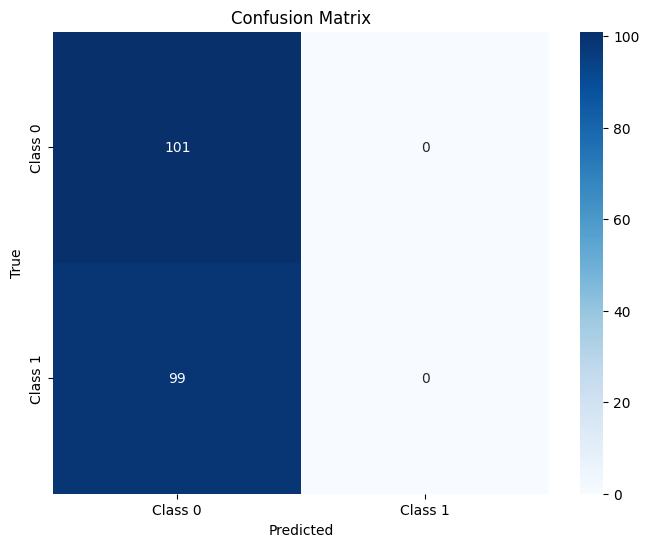

In [469]:


y_true = np.array(label_test, dtype=int)
y_pred = np.array(predictions, dtype=int)

# Convert continuous predictions to class labels (binary classification example)
y_pred = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(label_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

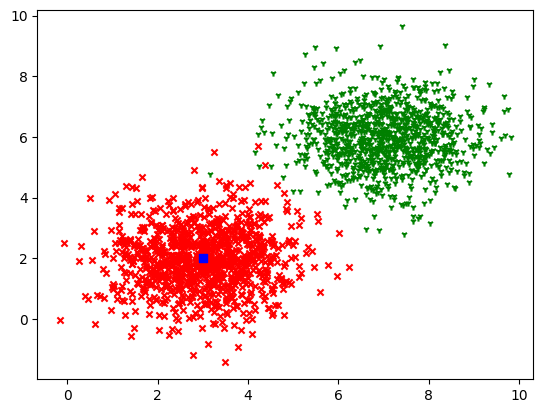

1/1 [==============================] - 0s 38ms/step


array([[0.14584175]], dtype=float32)

In [470]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

##współczynnik uczenia 0.01 (Adam)

Definiujemy model:

In [471]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [472]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.01**

In [473]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [474]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

Informacja o modelu:

In [475]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Proces **uczenia**:

In [476]:
epochs = 100
h = model.fit(data_points_train,label_train, verbose=1 ,epochs=epochs,validation_data=(data_points_val,label_val))

Epoch 1/100
50/50 [==============================] - 1s 8ms/step - loss: 4.4871 - accuracy: 0.5019 - val_loss: 2.8978 - val_accuracy: 0.4700
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 1.5713 - accuracy: 0.3706 - val_loss: 0.7926 - val_accuracy: 0.4300
Epoch 3/100
50/50 [==============================] - 1s 15ms/step - loss: 0.7351 - accuracy: 0.4938 - val_loss: 0.6971 - val_accuracy: 0.5200
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.5044 - val_loss: 0.6407 - val_accuracy: 0.5350
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6200 - accuracy: 0.5337 - val_loss: 0.5860 - val_accuracy: 0.5600
Epoch 6/100
50/50 [==============================] - 0s 6ms/step - loss: 0.5672 - accuracy: 0.6037 - val_loss: 0.5352 - val_accuracy: 0.6350
Epoch 7/100
50/50 [==============================] - 1s 10ms/step - loss: 0.5181 - accuracy: 0.6794 - val_loss: 0.4892 - val_accuracy: 0.7600
Epoch 8/100

In [477]:
Loss = h.history['loss']
Loss

[4.4871087074279785,
 1.571303367614746,
 0.7350919246673584,
 0.6763975620269775,
 0.6199502348899841,
 0.5671681761741638,
 0.5180543065071106,
 0.4738634526729584,
 0.4341699182987213,
 0.3983495235443115,
 0.3666553795337677,
 0.33850714564323425,
 0.3133900463581085,
 0.2913520932197571,
 0.27109000086784363,
 0.2535964548587799,
 0.23710857331752777,
 0.2230112999677658,
 0.20960015058517456,
 0.19785015285015106,
 0.18709872663021088,
 0.17720231413841248,
 0.16814716160297394,
 0.1598164141178131,
 0.15218910574913025,
 0.14516018331050873,
 0.13870775699615479,
 0.13266043365001678,
 0.1272650957107544,
 0.12193559855222702,
 0.1170932874083519,
 0.11259520798921585,
 0.10834994167089462,
 0.10451892763376236,
 0.10062997043132782,
 0.09733203798532486,
 0.09396027773618698,
 0.09097158163785934,
 0.08809593319892883,
 0.08532988280057907,
 0.08250167220830917,
 0.0800357535481453,
 0.07759977877140045,
 0.07526867091655731,
 0.07320705056190491,
 0.07114241272211075,
 0.06930

In [478]:
val_loss = h.history['val_loss']
val_loss

[2.8978164196014404,
 0.7926455736160278,
 0.6970934867858887,
 0.640662670135498,
 0.5860426425933838,
 0.5351865291595459,
 0.48924845457077026,
 0.4448699951171875,
 0.4068455994129181,
 0.37345245480537415,
 0.34279772639274597,
 0.3158978223800659,
 0.29241999983787537,
 0.2704443037509918,
 0.2522129416465759,
 0.23374944925308228,
 0.21954293549060822,
 0.20458519458770752,
 0.19217248260974884,
 0.17973646521568298,
 0.16994668543338776,
 0.16009965538978577,
 0.15134061872959137,
 0.14338192343711853,
 0.13643380999565125,
 0.12935006618499756,
 0.12290462851524353,
 0.11760581284761429,
 0.11140177398920059,
 0.10731176286935806,
 0.10253871232271194,
 0.09818238019943237,
 0.09445004165172577,
 0.09051677584648132,
 0.08637237548828125,
 0.08336620032787323,
 0.07965713739395142,
 0.07779774814844131,
 0.07520484179258347,
 0.07238207757472992,
 0.06924568116664886,
 0.06707758456468582,
 0.06456597149372101,
 0.06212496757507324,
 0.06020200625061989,
 0.057731423527002335,

In [479]:
val_accuracy = h.history['val_accuracy']
accuracy = h.history['accuracy']


Sprawdźmy jakie są **wartości wag**:

In [480]:
weights = model.get_weights()


print(weights[0])
print(weights[1])    #bias

[[1.2067593]
 [1.486919 ]]
[-11.953843]


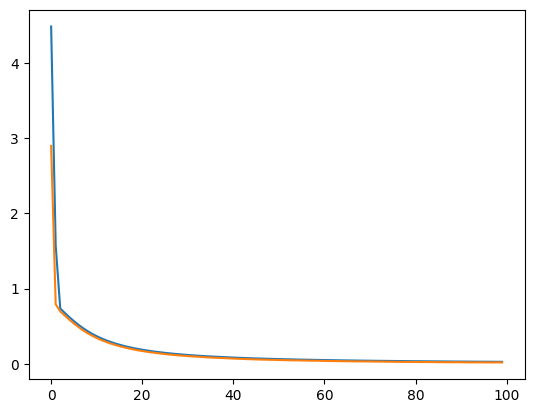

In [481]:
plt.plot(Loss)
plt.plot(val_loss)

plt.show()

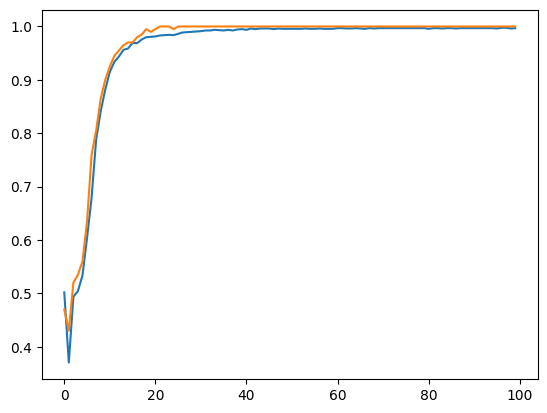

In [482]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.show()

Model.evaluate for test data

In [483]:
results = model.evaluate(data_points_test,label_test)
print("test loss, test acc:", results)

7/7 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9950
test loss, test acc: [0.021869869902729988, 0.9950000047683716]


Model.predict for test dataset

In [484]:
predictions = model.predict(data_points_test)

7/7 [==============================] - 0s 3ms/step


In [485]:
predictions

array([[2.53474480e-03],
       [1.98302278e-03],
       [1.90683256e-03],
       [9.01337385e-01],
       [1.32256402e-02],
       [1.35586699e-04],
       [2.27219332e-03],
       [2.54894421e-02],
       [9.87602115e-01],
       [9.90107417e-01],
       [7.27356784e-03],
       [9.98465359e-01],
       [9.99898851e-01],
       [1.72818406e-03],
       [7.90317368e-04],
       [9.69182074e-01],
       [9.93712068e-01],
       [9.99386609e-01],
       [9.83194292e-01],
       [1.10911347e-01],
       [9.98428941e-01],
       [9.97161448e-01],
       [9.96893823e-01],
       [9.98790085e-01],
       [9.98425245e-01],
       [9.31802213e-01],
       [9.90806937e-01],
       [9.95019078e-01],
       [9.98449206e-01],
       [9.86545920e-01],
       [5.35598755e-01],
       [2.24870397e-03],
       [9.82961833e-01],
       [3.69544490e-03],
       [9.96580780e-01],
       [1.44520830e-02],
       [1.30533753e-03],
       [8.53908597e-04],
       [1.25173712e-03],
       [3.41294426e-03],


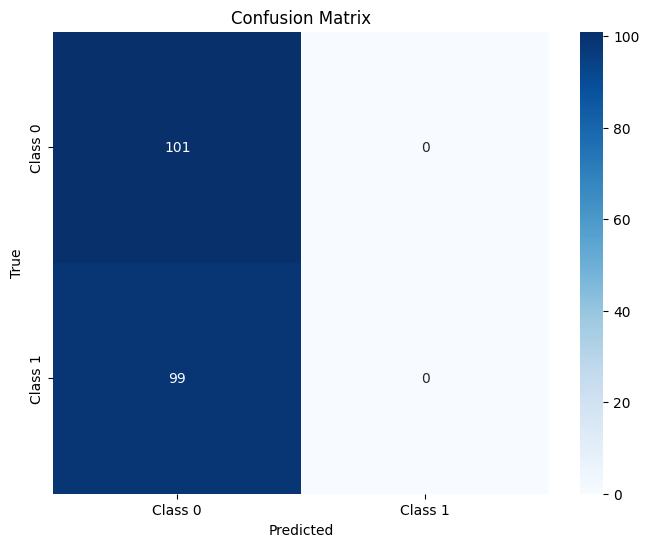

In [486]:


y_true = np.array(label_test, dtype=int)
y_pred = np.array(predictions, dtype=int)

# Convert continuous predictions to class labels (binary classification example)
y_pred = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(label_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

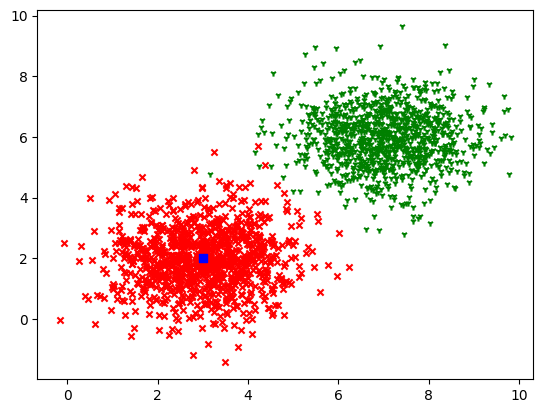

1/1 [==============================] - 0s 55ms/step


array([[0.00468018]], dtype=float32)

In [487]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

##Batch 100

Definiujemy model:

In [488]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [489]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [490]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [491]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

Informacja o modelu:

In [492]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Proces **uczenia**:

In [493]:
epochs = 100
h = model.fit(data_points_train,label_train, verbose=1 ,epochs=epochs,validation_data=(data_points_val,label_val),batch_size=100)

Epoch 1/100
16/16 [==============================] - 1s 19ms/step - loss: 0.6326 - accuracy: 0.6812 - val_loss: 0.6104 - val_accuracy: 0.7050
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5569 - accuracy: 0.7200 - val_loss: 0.5563 - val_accuracy: 0.7350
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5128 - accuracy: 0.7431 - val_loss: 0.5131 - val_accuracy: 0.7700
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4749 - accuracy: 0.7731 - val_loss: 0.4698 - val_accuracy: 0.7900
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4384 - accuracy: 0.7994 - val_loss: 0.4309 - val_accuracy: 0.8000
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4124 - accuracy: 0.8138 - val_loss: 0.4093 - val_accuracy: 0.8450
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3853 - accuracy: 0.8438 - val_loss: 0.3738 - val_accuracy: 0.8600
Epoch 8/100


In [494]:
Loss = h.history['loss']
Loss

[0.632643461227417,
 0.5568705201148987,
 0.5128270387649536,
 0.4749176800251007,
 0.4384467601776123,
 0.41243988275527954,
 0.3853127956390381,
 0.36152157187461853,
 0.33995163440704346,
 0.32266905903816223,
 0.3067723512649536,
 0.29157963395118713,
 0.2801555097103119,
 0.26656222343444824,
 0.25602996349334717,
 0.24664254486560822,
 0.2362978309392929,
 0.2281918078660965,
 0.21999399363994598,
 0.21321052312850952,
 0.20639485120773315,
 0.1994665563106537,
 0.19388844072818756,
 0.18897977471351624,
 0.18315167725086212,
 0.1782059520483017,
 0.17349140346050262,
 0.1694616675376892,
 0.1653120070695877,
 0.16137537360191345,
 0.15753518044948578,
 0.15402939915657043,
 0.15063470602035522,
 0.14766545593738556,
 0.14493577182292938,
 0.1423138976097107,
 0.13895124197006226,
 0.13625353574752808,
 0.13396055996418,
 0.1315893977880478,
 0.12914592027664185,
 0.1269971877336502,
 0.12509848177433014,
 0.12282595038414001,
 0.12107883393764496,
 0.11916346848011017,
 0.117190

In [495]:
val_loss = h.history['val_loss']
val_loss

[0.6103555560112,
 0.5562569499015808,
 0.5130530595779419,
 0.46981269121170044,
 0.4308638870716095,
 0.4093310832977295,
 0.37383681535720825,
 0.34814903140068054,
 0.33207985758781433,
 0.3083624541759491,
 0.2925091087818146,
 0.276888370513916,
 0.26331955194473267,
 0.25201690196990967,
 0.24361610412597656,
 0.22980383038520813,
 0.2214706391096115,
 0.21291182935237885,
 0.20495326817035675,
 0.19775062799453735,
 0.1905503123998642,
 0.19007457792758942,
 0.1779877096414566,
 0.17277663946151733,
 0.16913574934005737,
 0.1636907011270523,
 0.16054390370845795,
 0.15358227491378784,
 0.1503930687904358,
 0.14806264638900757,
 0.1429036557674408,
 0.14155209064483643,
 0.13514907658100128,
 0.1321689784526825,
 0.12908059358596802,
 0.1270720362663269,
 0.12503254413604736,
 0.1224367693066597,
 0.12097860127687454,
 0.11674413830041885,
 0.11534371972084045,
 0.11312393099069595,
 0.11078312993049622,
 0.10822034627199173,
 0.1067863255739212,
 0.10435349494218826,
 0.1026114

In [496]:
val_accuracy = h.history['val_accuracy']
accuracy = h.history['accuracy']


Sprawdźmy jakie są **wartości wag**:

In [497]:
weights = model.get_weights()


print(weights[0])
print(weights[1])    #bias

[[0.6415532]
 [1.0350044]]
[-7.0897894]


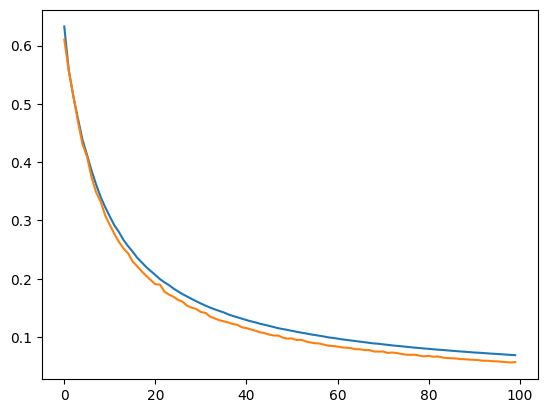

In [498]:
plt.plot(Loss)
plt.plot(val_loss)

plt.show()

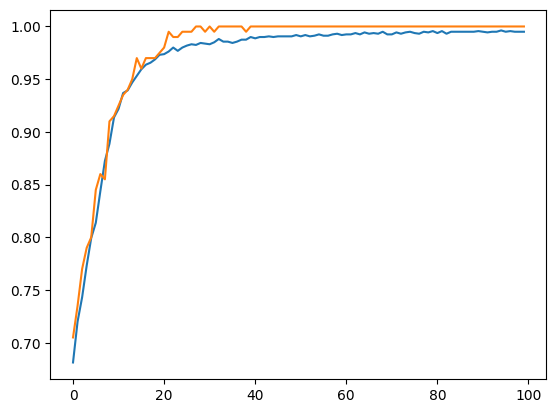

In [499]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.show()

Model.evaluate for test data

In [500]:
results = model.evaluate(data_points_test,label_test)
print("test loss, test acc:", results)

7/7 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9900
test loss, test acc: [0.06507639586925507, 0.9900000095367432]


Model.predict for test dataset

In [501]:
predictions = model.predict(data_points_test)

7/7 [==============================] - 0s 2ms/step


In [502]:
predictions

array([[0.03061506],
       [0.02970754],
       [0.03378763],
       [0.8604794 ],
       [0.06250159],
       [0.00524884],
       [0.02872296],
       [0.11492891],
       [0.9346273 ],
       [0.95655054],
       [0.06937538],
       [0.9831286 ],
       [0.99753606],
       [0.02158933],
       [0.01427579],
       [0.9228945 ],
       [0.9652144 ],
       [0.99094194],
       [0.9414663 ],
       [0.27193126],
       [0.9849501 ],
       [0.972614  ],
       [0.97890204],
       [0.9875761 ],
       [0.9850202 ],
       [0.8578745 ],
       [0.95688766],
       [0.9683834 ],
       [0.98275375],
       [0.95901155],
       [0.6651461 ],
       [0.02341713],
       [0.9364092 ],
       [0.04771084],
       [0.97234005],
       [0.06608246],
       [0.01898425],
       [0.01387625],
       [0.02215233],
       [0.04310142],
       [0.03301552],
       [0.06753518],
       [0.94801265],
       [0.99820507],
       [0.95847356],
       [0.13770348],
       [0.00440282],
       [0.981

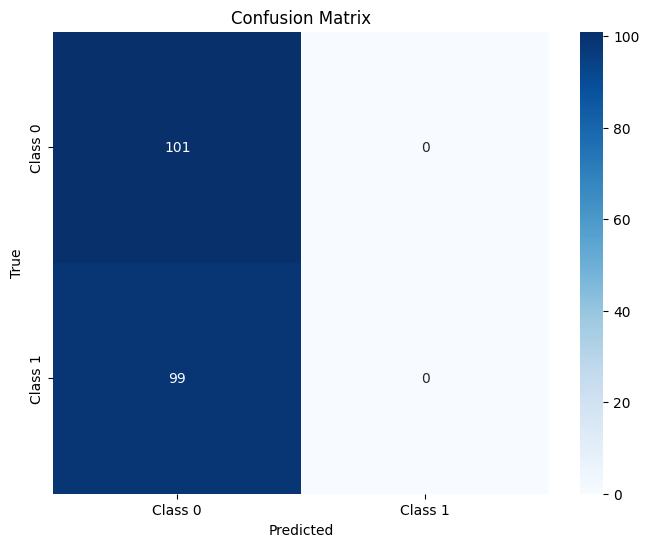

In [503]:


y_true = np.array(label_test, dtype=int)
y_pred = np.array(predictions, dtype=int)

# Convert continuous predictions to class labels (binary classification example)
y_pred = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(label_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

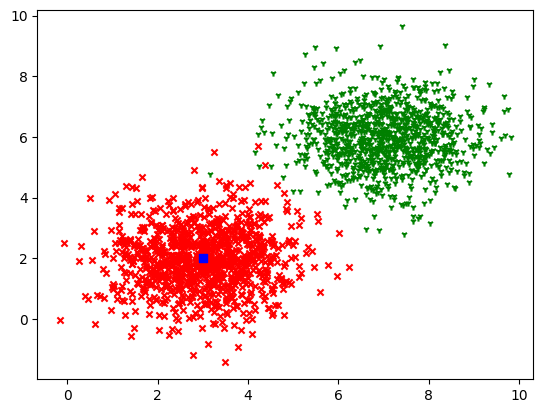

1/1 [==============================] - 0s 46ms/step


array([[0.04330896]], dtype=float32)

In [504]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

##Batch 200

Definiujemy model:

In [505]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [506]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [507]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [508]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

Informacja o modelu:

In [509]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Proces **uczenia**:

In [510]:
epochs = 100
h = model.fit(data_points_train,label_train, verbose=1 ,epochs=epochs,validation_data=(data_points_val,label_val),batch_size=200)

Epoch 1/100
8/8 [==============================] - 0s 23ms/step - loss: 1.3586 - accuracy: 0.4994 - val_loss: 0.5362 - val_accuracy: 0.5600
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5469 - accuracy: 0.5362 - val_loss: 0.5097 - val_accuracy: 0.6450
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5151 - accuracy: 0.6356 - val_loss: 0.4806 - val_accuracy: 0.6950
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4888 - accuracy: 0.7044 - val_loss: 0.4590 - val_accuracy: 0.7450
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.7663 - val_loss: 0.4406 - val_accuracy: 0.8200
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4463 - accuracy: 0.8019 - val_loss: 0.4257 - val_accuracy: 0.8500
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4277 - accuracy: 0.8363 - val_loss: 0.4097 - val_accuracy: 0.8700
Epoch 8/100
8/8 [=========

In [511]:
Loss = h.history['loss']
Loss

[1.3585566282272339,
 0.5468820333480835,
 0.5150704383850098,
 0.48877325654029846,
 0.464851975440979,
 0.4463202655315399,
 0.4276602268218994,
 0.41241690516471863,
 0.39824801683425903,
 0.3852619528770447,
 0.37288978695869446,
 0.3623234033584595,
 0.3520070016384125,
 0.3418486416339874,
 0.332467257976532,
 0.32376736402511597,
 0.31553924083709717,
 0.3079149127006531,
 0.30039504170417786,
 0.2931104302406311,
 0.28680160641670227,
 0.280144602060318,
 0.2737862765789032,
 0.26849478483200073,
 0.2625918984413147,
 0.25698742270469666,
 0.2534998655319214,
 0.24710582196712494,
 0.24272319674491882,
 0.23760293424129486,
 0.2336309850215912,
 0.22934368252754211,
 0.22514484822750092,
 0.22193187475204468,
 0.2177191525697708,
 0.21419258415699005,
 0.2106330543756485,
 0.20708239078521729,
 0.20384353399276733,
 0.2009851038455963,
 0.1975475698709488,
 0.19472496211528778,
 0.19176682829856873,
 0.18898777663707733,
 0.18669967353343964,
 0.18434131145477295,
 0.1815838962

In [512]:
val_loss = h.history['val_loss']
val_loss

[0.5361842513084412,
 0.5096993446350098,
 0.4805546700954437,
 0.4590274691581726,
 0.44056305289268494,
 0.42570868134498596,
 0.4096633791923523,
 0.39676952362060547,
 0.3806786835193634,
 0.3689177632331848,
 0.3574894666671753,
 0.3504687249660492,
 0.337431401014328,
 0.32764771580696106,
 0.3194611370563507,
 0.3120904266834259,
 0.3028360605239868,
 0.2947499454021454,
 0.28662747144699097,
 0.2796083688735962,
 0.27255669236183167,
 0.26895958185195923,
 0.26173824071884155,
 0.2569095194339752,
 0.2499256581068039,
 0.24331413209438324,
 0.23912519216537476,
 0.23500610888004303,
 0.22933639585971832,
 0.22476685047149658,
 0.2205430567264557,
 0.2152010202407837,
 0.21178649365901947,
 0.20708492398262024,
 0.20382417738437653,
 0.2012517899274826,
 0.19656501710414886,
 0.19365626573562622,
 0.1908787190914154,
 0.18668793141841888,
 0.18307793140411377,
 0.18097586929798126,
 0.1778327226638794,
 0.1757078915834427,
 0.1733546406030655,
 0.16982829570770264,
 0.1668108701

In [513]:
val_accuracy = h.history['val_accuracy']
accuracy = h.history['accuracy']


Sprawdźmy jakie są **wartości wag**:

In [514]:
weights = model.get_weights()


print(weights[0])
print(weights[1])    #bias

[[0.43002713]
 [0.8891428 ]]
[-5.3686643]


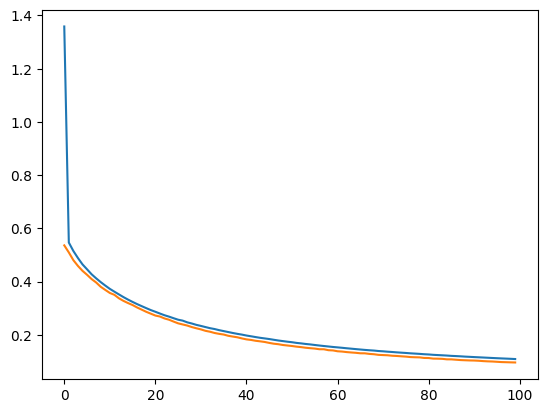

In [515]:
plt.plot(Loss)
plt.plot(val_loss)

plt.show()

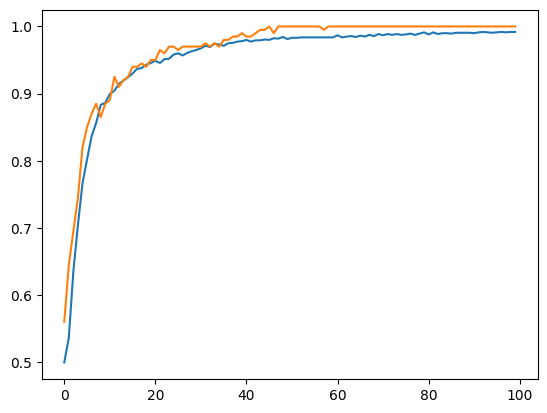

In [516]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.show()

Model.evaluate for test data

In [517]:
results = model.evaluate(data_points_test,label_test)
print("test loss, test acc:", results)

7/7 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9850
test loss, test acc: [0.1057654321193695, 0.9850000143051147]


Model.predict for test dataset

In [518]:
predictions = model.predict(data_points_test)

7/7 [==============================] - 0s 2ms/step


In [519]:
predictions

array([[0.07123233],
       [0.07523075],
       [0.09137069],
       [0.8460729 ],
       [0.10188225],
       [0.01885209],
       [0.06799197],
       [0.18528704],
       [0.882833  ],
       [0.9280348 ],
       [0.14731883],
       [0.96053   ],
       [0.9924932 ],
       [0.05060777],
       [0.03850619],
       [0.8959728 ],
       [0.93719536],
       [0.97651166],
       [0.91082525],
       [0.3561364 ],
       [0.96683425],
       [0.93855333],
       [0.9591965 ],
       [0.9719973 ],
       [0.9670887 ],
       [0.81779516],
       [0.926722  ],
       [0.9398279 ],
       [0.95943904],
       [0.9415033 ],
       [0.71474755],
       [0.05109481],
       [0.90025055],
       [0.11400155],
       [0.94215715],
       [0.10648099],
       [0.04719237],
       [0.03581626],
       [0.05975904],
       [0.10220254],
       [0.06697278],
       [0.14544137],
       [0.907635  ],
       [0.99311906],
       [0.9181507 ],
       [0.22563216],
       [0.01542331],
       [0.965

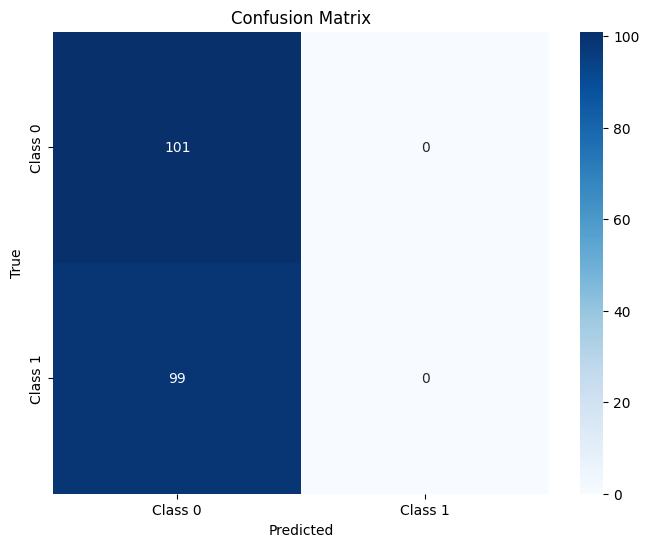

In [520]:


y_true = np.array(label_test, dtype=int)
y_pred = np.array(predictions, dtype=int)

# Convert continuous predictions to class labels (binary classification example)
y_pred = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(label_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

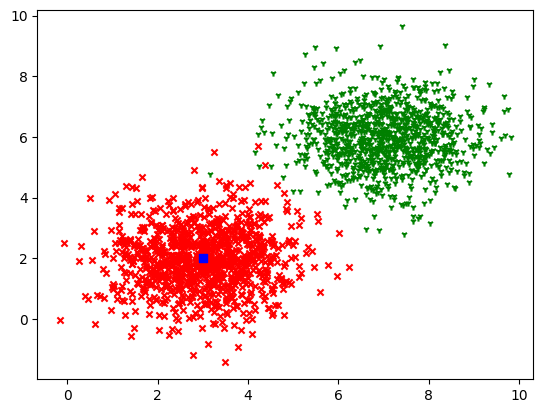

1/1 [==============================] - 0s 36ms/step


array([[0.09109835]], dtype=float32)

In [521]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

##Batch 400

Definiujemy model:

In [522]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [523]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [524]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [525]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

Informacja o modelu:

In [526]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Proces **uczenia**:

In [527]:
epochs = 100
h = model.fit(data_points_train,label_train, verbose=1 ,epochs=epochs,validation_data=(data_points_val,label_val),batch_size=400)

Epoch 1/100
4/4 [==============================] - 1s 64ms/step - loss: 4.9466 - accuracy: 0.5006 - val_loss: 0.7121 - val_accuracy: 0.4900
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6941 - accuracy: 0.4913 - val_loss: 0.6292 - val_accuracy: 0.5200
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6504 - accuracy: 0.4988 - val_loss: 0.6058 - val_accuracy: 0.5200
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6257 - accuracy: 0.4981 - val_loss: 0.5877 - val_accuracy: 0.5250
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6035 - accuracy: 0.4981 - val_loss: 0.5690 - val_accuracy: 0.5250
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5859 - accuracy: 0.5038 - val_loss: 0.5558 - val_accuracy: 0.5400
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.5667 - accuracy: 0.5144 - val_loss: 0.5432 - val_accuracy: 0.5650
Epoch 8/100
4/4 [===

In [528]:
Loss = h.history['loss']
Loss

[4.946639060974121,
 0.6941288113594055,
 0.6504337191581726,
 0.6256660223007202,
 0.6034854054450989,
 0.5858739614486694,
 0.5666866898536682,
 0.5514967441558838,
 0.5354019999504089,
 0.5212358236312866,
 0.5102964043617249,
 0.49680137634277344,
 0.4862022399902344,
 0.47653305530548096,
 0.46628937125205994,
 0.45713701844215393,
 0.4479875862598419,
 0.4399113953113556,
 0.43175941705703735,
 0.4244459569454193,
 0.41786858439445496,
 0.4100489318370819,
 0.4045226275920868,
 0.3973500728607178,
 0.3903951942920685,
 0.38460665941238403,
 0.37864983081817627,
 0.3731040954589844,
 0.36728546023368835,
 0.36273592710494995,
 0.3569178283214569,
 0.3518895208835602,
 0.34671542048454285,
 0.34250086545944214,
 0.3374026417732239,
 0.33291131258010864,
 0.3285941183567047,
 0.3242977559566498,
 0.3202970027923584,
 0.3166098892688751,
 0.3120487630367279,
 0.30896562337875366,
 0.3047181963920593,
 0.3012007176876068,
 0.2972562313079834,
 0.293799489736557,
 0.29037564992904663,


In [529]:
val_loss = h.history['val_loss']
val_loss

[0.7120949029922485,
 0.6292077898979187,
 0.6057722568511963,
 0.5877101421356201,
 0.5689664483070374,
 0.5557912588119507,
 0.543214738368988,
 0.5249843597412109,
 0.512743353843689,
 0.502606987953186,
 0.4910750091075897,
 0.47879964113235474,
 0.47133171558380127,
 0.46434393525123596,
 0.4523845314979553,
 0.44290801882743835,
 0.4358277916908264,
 0.4272945523262024,
 0.42167654633522034,
 0.41398751735687256,
 0.4059516191482544,
 0.3990815281867981,
 0.394399493932724,
 0.3868370056152344,
 0.3804897367954254,
 0.37338364124298096,
 0.3678818643093109,
 0.36199623346328735,
 0.35678935050964355,
 0.3528522551059723,
 0.3465017080307007,
 0.34142497181892395,
 0.3378354012966156,
 0.3324680030345917,
 0.3279229700565338,
 0.3228605389595032,
 0.31862872838974,
 0.3133212924003601,
 0.30902573466300964,
 0.30543506145477295,
 0.30318987369537354,
 0.29765185713768005,
 0.2934528589248657,
 0.2897641062736511,
 0.2861851751804352,
 0.28257298469543457,
 0.27898675203323364,
 0.

In [530]:
val_accuracy = h.history['val_accuracy']
accuracy = h.history['accuracy']


Sprawdźmy jakie są **wartości wag**:

In [531]:
weights = model.get_weights()


print(weights[0])
print(weights[1])    #bias

[[0.21406241]
 [0.7659361 ]]
[-3.657632]


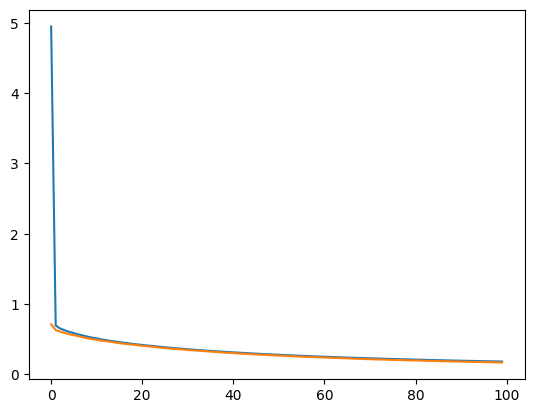

In [532]:
plt.plot(Loss)
plt.plot(val_loss)

plt.show()

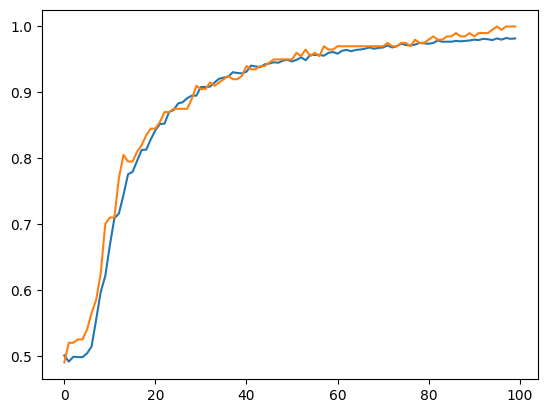

In [533]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.show()

Model.evaluate for test data

In [534]:
results = model.evaluate(data_points_test,label_test)
print("test loss, test acc:", results)

7/7 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9850
test loss, test acc: [0.17931680381298065, 0.9850000143051147]


Model.predict for test dataset

In [535]:
predictions = model.predict(data_points_test)

7/7 [==============================] - 0s 2ms/step


In [536]:
predictions

array([[0.1597255 ],
       [0.18257335],
       [0.23323365],
       [0.8436012 ],
       [0.16159317],
       [0.06567195],
       [0.15511115],
       [0.29138932],
       [0.8071573 ],
       [0.89182377],
       [0.29635254],
       [0.91658664],
       [0.9799635 ],
       [0.11448952],
       [0.10027651],
       [0.8717588 ],
       [0.8972518 ],
       [0.9453693 ],
       [0.8760823 ],
       [0.4632182 ],
       [0.93442595],
       [0.8747321 ],
       [0.9292407 ],
       [0.94357884],
       [0.93515074],
       [0.78124505],
       [0.8868053 ],
       [0.89619815],
       [0.9137659 ],
       [0.9254657 ],
       [0.7774626 ],
       [0.10753448],
       [0.85660416],
       [0.25762442],
       [0.89023733],
       [0.16709231],
       [0.11322258],
       [0.08914503],
       [0.15495825],
       [0.23077172],
       [0.13132079],
       [0.29628295],
       [0.84984493],
       [0.9764911 ],
       [0.85283184],
       [0.35785088],
       [0.0522086 ],
       [0.942

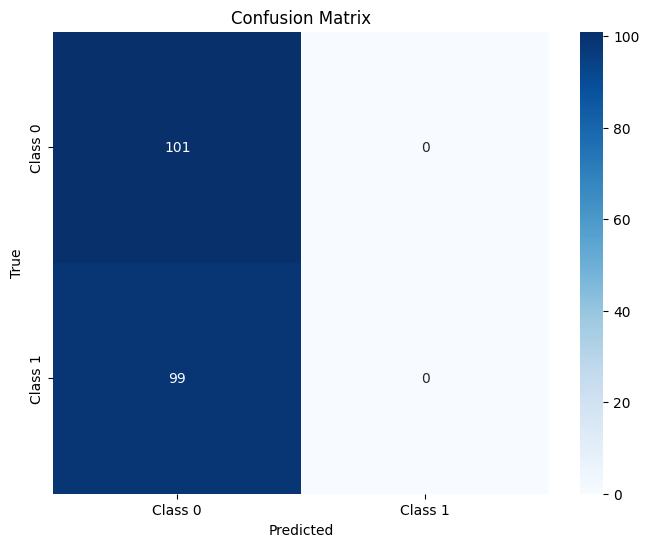

In [537]:


y_true = np.array(label_test, dtype=int)
y_pred = np.array(predictions, dtype=int)

# Convert continuous predictions to class labels (binary classification example)
y_pred = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(label_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

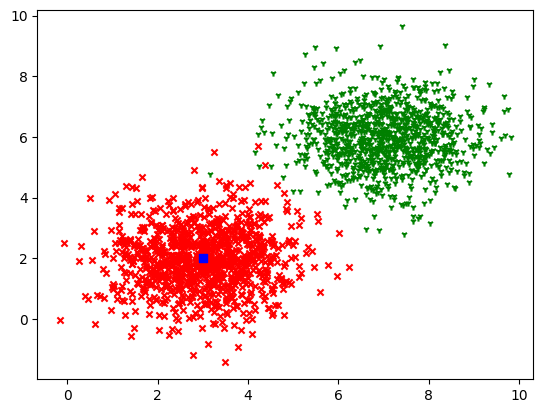

1/1 [==============================] - 0s 40ms/step


array([[0.1848884]], dtype=float32)

In [538]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

##Najlepszy model

Na uczenie modelu ma najwiekszy wpływ użycie batcha (bez batcha jest podawany cały zbiór uczący), dzięki temu wprowadza, że pewną losowość w procesie uczenia, pomoga to uniknąć utknięcia w minimach lokalnych. Model uczony z minibatchem osiąga lepsze rezultaty jeżeli chodzi o wyniki uczenia(szybszy spadek funkcji błędu oraz mniejszy błąd). Model lepiej i szybciej się uczy gdy mini-batch jest większy niż gdy jest on mniejszy.

Ponadto na proces uczenia modelu ma wpływ ilość epok.
Za mała ilość epok skutkuje niedouczeniem modelu (model nie nauczył się wystarczająco dobrze dostosowywać się do danych treningowych).
Ostatnim sprawdzonym przeze mnie parametrem jest współczynnik uczenia. Po przestawieniu na współczynnik Adam model uczy się lepiej
Jego zbyt duża wartość rowadzi do skakania wokół minimum globalnego przy czym model go nie osiągnie. W przypadku zastosowania zbyt małej wartości współczynnika uczenia proces uczenia jest bardzo wolny na przełomie epok.